In [53]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd

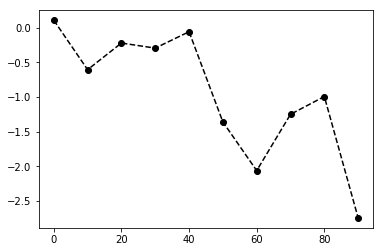

In [2]:
### Series.plot作圖
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))
s.plot(label = 'ta',style = 'ko--') 

,a,b,c,d
0,0.630237,0.500640,0.732450,0.189414
10,1.053847,0.667559,0.888501,0.911107
20,1.219244,1.573254,1.443917,1.046192
30,1.954598,2.107636,1.660465,1.351009
40,2.860930,2.859316,1.755225,1.667309
50,3.469872,3.767688,2.406372,1.733313
60,3.564538,4.595151,3.099046,2.395393
70,4.486934,4.887861,4.004058,2.923949
80,4.705626,5.032321,4.780841,3.436965
90,5.307712,5.793237,5.369942,3.545656


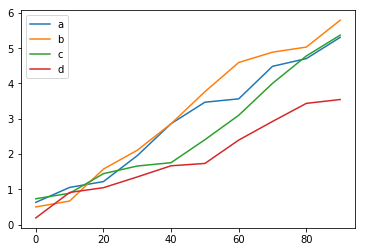

In [3]:
### DataFrame作圖
df = pd.DataFrame(np.random.rand(10,4).cumsum(0),
                 columns = ['a','b','c','d'],
                 index = np.arange(0,100,10))
#np.arange(8).reshape((2,4)).cumsum(0) 0 => 直得累加（維度 = 0）
#np.arange(8).reshape((2,4)).cumsum(1) 1 => 橫得累加（維度 = 1）
df.plot()
df

DataFrame 專用plot方法參數
```
   index   => x座標
   values  => y座標
   columes => 線的種類
```

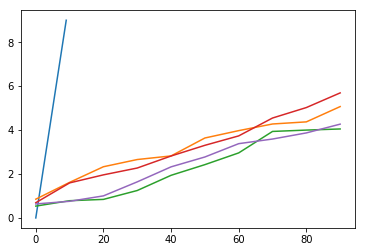

In [6]:
### matplotlib.pyplot作圖

#plt.plot(可以放array,list,tuple,dataframe)

#matplotlib中的圖，是儲存在 Figure的物件

plt.plot(np.arange(10)) 

plt.plot(pd.DataFrame(np.random.rand(10,4).cumsum(0),
               columns = ['a','b','c','d'],
               index = np.arange(0,100,10))) 


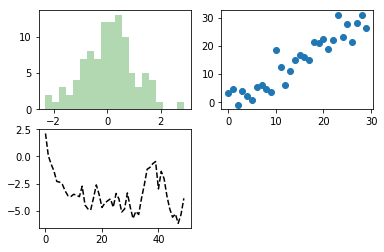

In [10]:
### 建Figure，放入子圖

#matplotlib中的圖，儲存在Figure的物件

fig = plt.figure()           #建立Figure
ax1 = fig.add_subplot(2,2,1) #建立子圖（2*2），回傳的是 “AxesSubplot物件“
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(),'k--') #放在最後建立的子圖 => ax3

#AxesSubplot物件的方法：hist,scatter,bar,pie...
ax1 = ax1.hist(np.random.randn(100) , bins = 20, color = 'g',alpha = 0.3) #hist = 直方圖 ,bins = 長條數 
ax2.scatter(np.arange(30), np.arange(30) + 3 *np.random.randn(30))        #scatter = 點圖 (x,y)個數要一樣

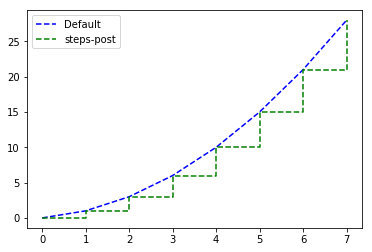

In [14]:
### plt.legend => 顯示label

data = np.arange(8).cumsum()
plt.plot(data, 'k--',label = 'Default',color = 'b')  #label = 標題
plt.plot(data, 'k--',drawstyle = 'steps-post',label = 'steps-post' ,color = 'g')

plt.legend(loc = 'best') # loc = 位置


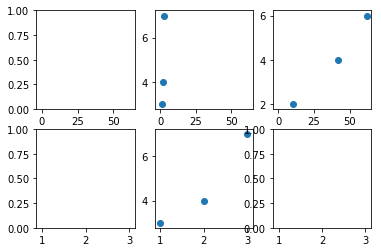

In [16]:
### plt.subplots => 一次建figure&subplots

# fig1 , axes1 = plt.subplots(2,3) # 一次建立多個子圖 
# axes1[0,2].scatter((10,42,62),(20,34,36))
# axes1[0,1].scatter((1,2,3),(3,4,7))

fig2 , axes2 = plt.subplots(2,3, sharex = 'row' )  
# sharex 所以子圖都有一樣比例 可給定 bool or {'none', 'all', 'row', 'col'}, default: False

axes2[0,2].scatter((10,42,62),(2,4,6))
axes2[0,1].scatter((1,2,3),(3,4,7))
axes2[1,1].scatter((1,2,3),(3,4,7))


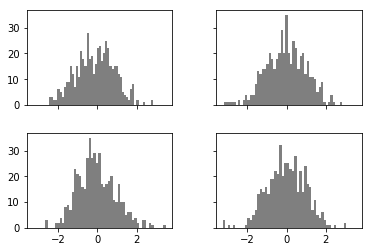

In [20]:
### subplots_adjust => 調整子圖間距

fig , axes = plt.subplots(2,2,sharex = True , sharey = True) #x,y軸 全部共享

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins = 50 , color = 'k' , alpha = 0.5)
#plt.subplots_adjust(wspace = 0 , hspace = 0)       # w左右,h上下
#plt.subplots_adjust(wspace = 0 , hspace = 0.3)
#fig.subplots_adjust(wspace = 0.3 , hspace = 0)
fig.subplots_adjust(wspace = 0.3 , hspace = 0.3)

[Text(0.5,0,'stages-2'), Text(0.5,1,'first plot')]

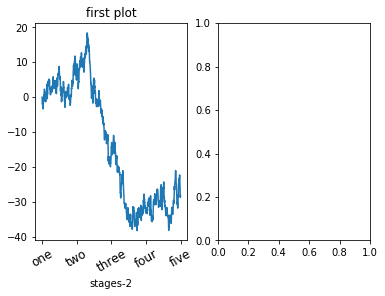

In [24]:
### axes.set_????? => 修改子圖屬性

fig , axes = plt.subplots(1,2) 
axes[0].plot(np.random.randn(1000).cumsum())#隨機漫步

#一律回傳list
ticks  = axes[0].set_xticks([0,250,500,750,1000]) 
labels = axes[0].set_xticklabels(['one','two','three','four','five'], rotation = 30 , fontsize = 'large')
#rotation = x軸刻度標籤旋轉30度 ; fontsize = 字大小


##用字典更改屬性

# #法ㄧ
# axes[0].set_title ('mp first plot')
# axes[0].set_xlabel('stages')        

#法二
props = {
    'title' :'first plot',
    'xlabel':'stages-2',
}

#* args 和 kwargs傳遞可變長參數
axes[0].set(**props) #axes類別有一個set的方法，可以批次設定圖的屬性

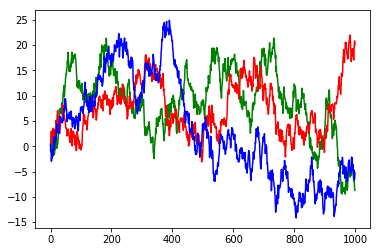

In [32]:
### 子圖存檔

fig = plt.figure() 
ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(1000).cumsum() , 'k' , label = 'one' , color = 'g')
ax.plot(np.random.randn(1000).cumsum() , 'k' , label = '_nolegend_' , color = 'r')

#有不想顯示在圖例上的元素，就不要傳label 或傳label = '_nolegend_'
ax.plot(np.random.randn(1000).cumsum() , 'k' , label = 'three' , color = 'b')


#plt.legend(loc = 'best')
#ax.legend(loc = 'best') #與上同義

#存檔
#dpi=解析度 bbox_inches=周圍空白拿掉
#plt.savefig('figpath.pdf',dpi = 400 , bbox_inches = 'tight') 
plt.savefig('/Users/curry27/Desktop/EM_files/figpath.pdf',dpi = 400 , bbox_inches = 'tight') 



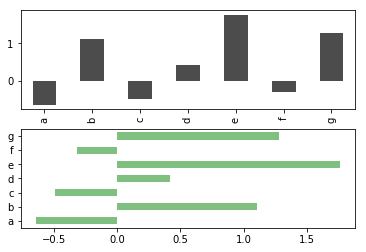

In [33]:
###Series 作圖 放入figure

fig , axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(7) , index = list('abcdefg'))

#ax選位置
data.plot.bar (ax = axes[0] , color = 'k' , alpha = 0.7) #直的
data.plot.barh(ax = axes[1] , color = 'g' , alpha = 0.5) #橫的
#data.plot.barh( color = 'g' , alpha = 0.5) #橫的


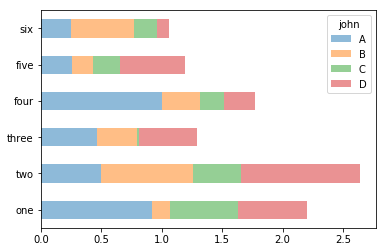

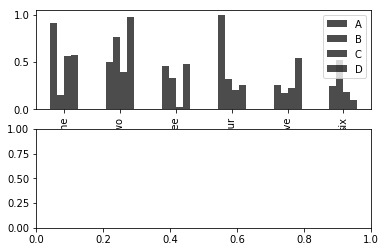

In [43]:
###DataFrame 作圖 放入figure

#index & columes 可放入Index物件（取名）
df = pd.DataFrame(np.random.rand(6,4),
             index   = ['one','two','three','four','five','six'],
             columns = pd.Index(['A','B','C','D'],name = 'john')) 
# df = pd.DataFrame(np.random.rand(6,4),
#              index   = pd.Index(['one','two','three','four','five','six'],name = 'size'),
#              columns = pd.Index(['A','B','C','D'],name = 'john')) 

#stacked=True =>將長條圖接起來
#df.plot.bar()
df.plot.barh(stacked = True , alpha=0.5)

fig , axes = plt.subplots(2,1)

#AxesSubplot.plot => 無法放入DataFrame
#axes[0].bar(df)
df.plot.bar (ax = axes[0] , color = 'k', alpha = 0.7)  #ax =>放入位置
axes[0].legend(loc = 'best') 



In [46]:
nba_data = pd.read_csv('/Users/curry27/Desktop/nba.games.stats.csv')
nba_data
someteams_data = nba_data[nba_data['Team'].isin(['GSW','HOU','CLE','UTA','OKC'])]
someteams_data.columns

Index(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'],
      dtype='object')

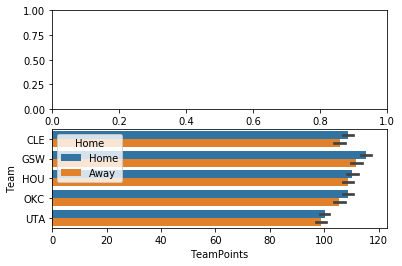

In [64]:
### 用seaborn畫圖 => 儲存在Figure的物件
import seaborn as sns
fig , axes = plt.subplots(2,1)
#sns.barplot(ax = axes[0],x = 'TeamPoints' , y = 'Team' , data = someteams_data , orient = 'h') #x軸 => numeric
#sns.barplot(x = 'Assists'    , y = 'Team' , data = someteams_data , orient = 'h')
sns.barplot(x = 'TeamPoints' , y = 'Team' , data = someteams_data , orient = 'h' ,hue = 'Home') #hue多比一項(類別)


/Users/curry27/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


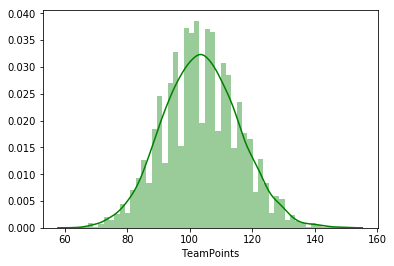

In [68]:
### Seaborn.distplot => 合併兩圖(DataFrame)

#nba_data['TeamPoints'].plot.hist(bins = 50) 
#nba_data['TeamPoints'].plot.density() #模擬常態

sns.distplot(nba_data['TeamPoints'], bins = 50 , color = 'g')

/Users/curry27/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


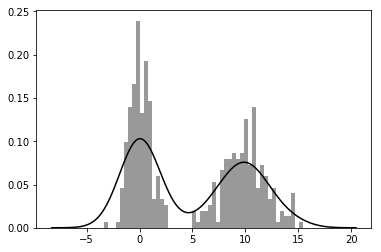

In [70]:
### Seaborn.distplot => 合併兩圖(Series)

n1 = np.random.normal(0,1,size = 200)
n2 = np.random.normal(10,2,size = 200)
values = pd.Series(np.concatenate([n1,n2])) 

sns.distplot(values , bins = 50 , color = 'k') 

Text(0.5,1,'FieldGoals-Assists-regplot')

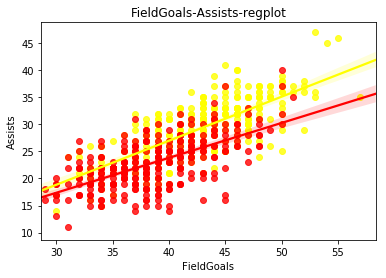

In [73]:
### Seaborn.regplot => 畫散佈圖＆回歸線

nba_data = pd.read_csv('/Users/curry27/Desktop/nba.games.stats.csv')

GSW_data = nba_data[nba_data['Team']=='GSW'] 
HOU_data = nba_data[nba_data['Team']=='HOU'] 

sns.regplot('FieldGoals','Assists',data = GSW_data , color = 'yellow')
sns.regplot('FieldGoals','Assists',data = HOU_data , color = 'red') 

plt.title('FieldGoals-Assists-regplot') 


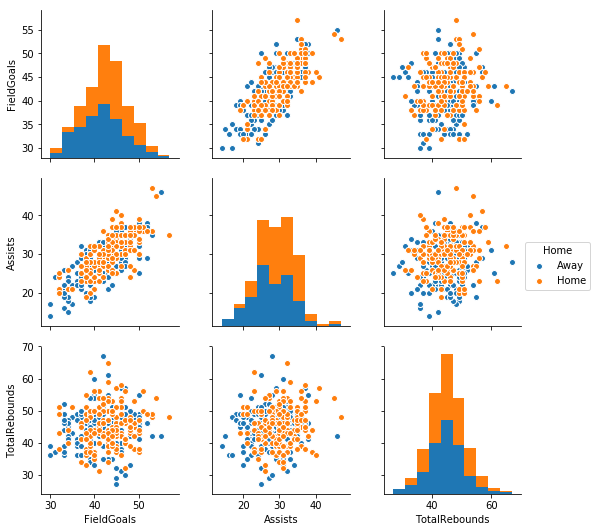

In [77]:
### Seaborn.pairplot => 畫散佈圖矩陣

#投籃命中率、助攻、籃板、失誤 做散佈圖矩陣
GSW_data_new = GSW_data[['FieldGoals','Assists','TotalRebounds','Home']]

#只挑numeric

#sns.pairplot(GSW_data_new , diag_kind = 'kde'  , plot_kws = {'alpha':0.2}) #plot_kws參數
#sns.pairplot(GSW_data_new , diag_kind = 'hist' , kind = 'reg') 
sns.pairplot(GSW_data_new ,hue="Home")


sns.pairplot參數
```
diag_kind ='kde','hist'
kind      ='scatter','reg'
hue => 固定某變數
```

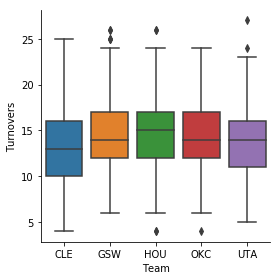

In [80]:
### Seaborn.factorplot => 畫多個 “類別變數” （層面圖組與分組資料）

someteams_data = nba_data[nba_data['Team'].isin(['GSW','HOU','CLE','UTA','OKC'])]
#someteams_data.columns

#sns.factorplot(x ='Team',y ='FieldGoals' ,col ='WINorLOSS' ,hue ='Home' ,kind ='bar' ,data= someteams_data)
#sns.factorplot(x ='Team',y ='Turnovers'  ,col ='WINorLOSS' ,hue ='Home' ,kind ='bar' ,data= someteams_data ,color='r')

#以 "主客場" 和 "勝負" 作為分層 => 2*2
#sns.factorplot(x ='Team',y ='Turnovers'  ,col ='WINorLOSS' ,row ='Home' ,kind='bar',data= someteams_data) 
sns.factorplot(x ='Team',y ='Turnovers'  ,kind ='box'      ,data= someteams_data) #箱形圖

層面圖組與分組資料
```
上圖：以隊伍/主客場/勝負 的 投籃命中數圖
下圖：以隊伍/主客場/勝負 的 失誤數圖
```